## Dipole moment of H-alpha velocity map
Idea: "Measure" the amount of rotation in a galaxy by computing the dipole moment of H-alpha velocity maps. We expect to see a bimodal distribution which will help make a better cut on elliptical galaxies with little/no rotation
1. Mask H-alpha map w default mask + S/N > 5 cut
2. Choose reference point as brightest spaxel in flux map
3. Compute dipole moment 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy.ma as ma

import sys
sys.path.insert(1,'/Users/nityaravi/Documents/Github/RotationCurves/spirals')

from DRP_rotation_curve import extract_data

In [19]:
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['savefig.dpi'] = 300

In [26]:
MAP_FOLDER = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/DR17/'
test_gal = '8080-12702' #spiral galaxy

In [27]:
maps = extract_data(MAP_FOLDER, test_gal, ['Ha_vel', 'r_band', 'Ha_flux'])

In [28]:
# mask
mask = np.logical_or(maps['Ha_vel_mask'], maps['Ha_flux']*np.sqrt(maps['Ha_flux_ivar']) < 5)
mHa_vel = ma.array(maps['Ha_vel'], mask=mask)
mflux = ma.array(maps['r_band'], mask=mask)

Text(0.5, 1.0, '8080-12702 H-alpha velocity')

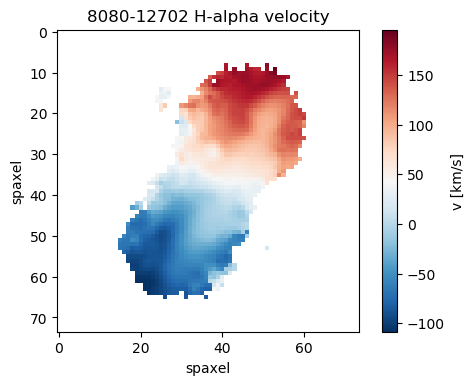

In [30]:
plt.imshow(mHa_vel, cmap='RdBu_r')
plt.colorbar(label='v [km/s]')
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.title(test_gal + ' H-alpha velocity')

Text(0.5, 1.0, '8080-12702 flux')

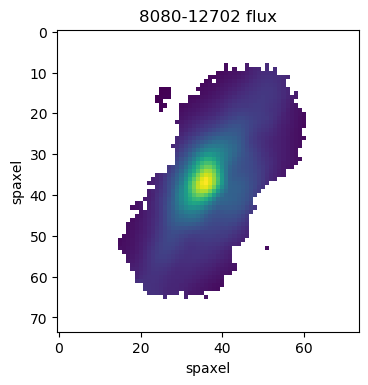

In [31]:
plt.imshow(mflux)
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.title(test_gal + ' flux')

In [92]:
# take center to be brightest point in masked flux map
x0, y0 = np.unravel_index(ma.argmax(mflux), mflux.shape)

In [98]:
p = [0,0]
shape = mHa_vel.shape
for i in range(shape[0]):
    for j in range(shape[1]):
        
        if not ma.is_masked(mHa_vel[i][j]):
            p += mHa_vel[i][j] * np.array([i-x0, j-y0])

In [105]:
np.sqrt(np.dot(p,p))

2114170.2218711376

wrap in a function

In [133]:
def dipole_moment(Ha_vel, Ha_vel_mask, Ha_flux, Ha_flux_ivar, r_band):
    
    # mask all maps
    
    mask = np.logical_or(Ha_vel_mask, Ha_flux*np.sqrt(Ha_flux_ivar) < 5)
    mHa_vel = ma.array(Ha_vel, mask=mask)
    mflux = ma.array(r_band, mask=mask)
    
    # guess the center by brightest spaxel
    
    x0, y0 = np.unravel_index(ma.argmax(mflux), mflux.shape)
    
    # caculate dipole moment
    p = [0,0]
    shape = mHa_vel.shape
    for i in range(shape[0]):
        for j in range(shape[1]):
            
            if not ma.is_masked(mHa_vel[i][j]):
                p += mHa_vel[i][j] * np.array([i-x0, j-y0])
                
    return np.hypot(p[0], p[1])

In [134]:
# test function

dipole_moment(maps['Ha_vel'], maps['Ha_vel_mask'], maps['Ha_flux'], maps['Ha_flux_ivar'], maps['r_band'])

2114170.2218711376